# Faults annotation

Here will show annotation format and structure of faults.

In [1]:
# some imports
import sys
import warnings
warnings.filterwarnings("ignore")

from copy import copy
import glob

import numpy as np
import torch.nn as nn
from tqdm.notebook import tqdm_notebook

sys.path.append('../..')

from seismiqb import *
from seismiqb.src.controllers.torch_models import ExtensionModel

from seismiqb.batchflow import FilesIndex, Pipeline
from seismiqb.batchflow import D, B, V, P, R, L

## Initial annotation

Faults can be sored in different formats (see `Fault` class documentation).
In our case each csv-like file corresponds to one fault.

In [14]:
CUBE_FOLDER = '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM'

In [141]:
fault = glob.glob(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/*')[0]

In [142]:
glob.glob(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/*')

['/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_2',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_6',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_7',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_14',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_9',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_4',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_1',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_3',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_12',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_13',
 '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/INPUTS/FAULTS/RAW/new_fault_11',
 '/data/seismic_d

Columns are `['INLINE', 'iline', 'xline', 'cdp_x', 'cdp_y', 'height', 'name', 'number']`

In [143]:
! head "{fault}"

INLINE- 85 384 10105384.07505 6241157.18939 2370.1205 Fault_interpretation_2 1
INLINE- 85 387 10105384.07505 6241221.8102400005 2933.8130100000003 Fault_interpretation_2 1
INLINE- 95 384 10105634.08409 6241157.18939 2382.8007 Fault_interpretation_2 2
INLINE- 95 387 10105634.08409 6241221.8102400005 2872.90962 Fault_interpretation_2 2
INLINE- 105 379 10105884.09313 6241027.94769 2386.0668100000003 Fault_interpretation_2 3
INLINE- 105 389 10105884.09313 6241286.4310800005 2904.99437 Fault_interpretation_2 3
INLINE- 115 379 10106134.10217 6241031.74892 2376.4606 Fault_interpretation_2 4
INLINE- 115 384 10106134.10217 6241157.18939 2882.51584 Fault_interpretation_2 4
INLINE- 125 369 10106384.11121 6240777.06676 2370.1205 Fault_interpretation_2 5
INLINE- 125 377 10106384.11121 6240967.12807 2895.38816 Fault_interpretation_2 5


Firstly, we check that all files have known structure. Otherwise, we have to fix some files.

In [18]:
# Fault.check_format(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/*', verbose=False)

In [19]:
# Fault.split_file(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/B_Faults_J2-J10', CUBE_FOLDER + '/INPUTS/FAULTS/PROCESSED')

At the loading stage, we interpolate each fault as a surface. 

In [20]:
# %%time

cube_path = glob.glob(CUBE_FOLDER + '/amp*.hdf5')[0]

# dataset = SeismicCubeset(FilesIndex(path=cube_path, no_ext=True))

# dataset.load(label_dir='/INPUTS/FAULTS/PROCESSED/*', labels_class=Fault, width=1)
# dataset.modify_sampler(dst='train_sampler', finish=True)

Sticks interpolation is time consuming procedure, therefore we dump resulting points as a `.npy` files

In [21]:
# dataset.dump_labels('/INPUTS/FAULTS/NPY', separate=True)

... and make loading faster!

In [133]:
%%time

dataset = SeismicCubeset(FilesIndex(path=cube_path, no_ext=True))

dataset.load(label_dir='/INPUTS/FAULTS/NPY_WIDTH_3/*', labels_class=Fault)
dataset.modify_sampler(dst='train_sampler', finish=True)

CPU times: user 2.06 s, sys: 288 ms, total: 2.35 s
Wall time: 2.35 s


# Map of faults

Now let's see the map of faults.

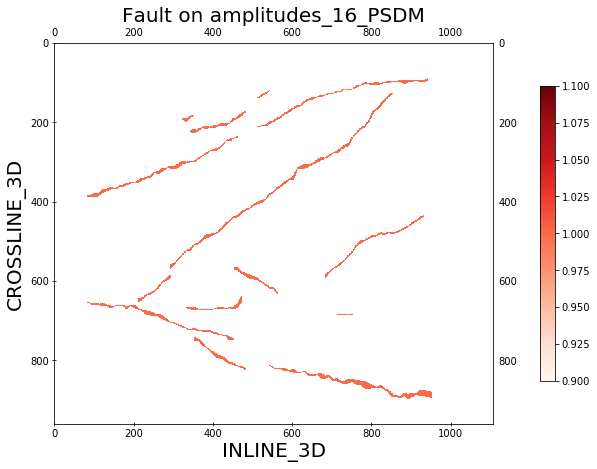

In [134]:
dataset.show_points()

And slice from the cube

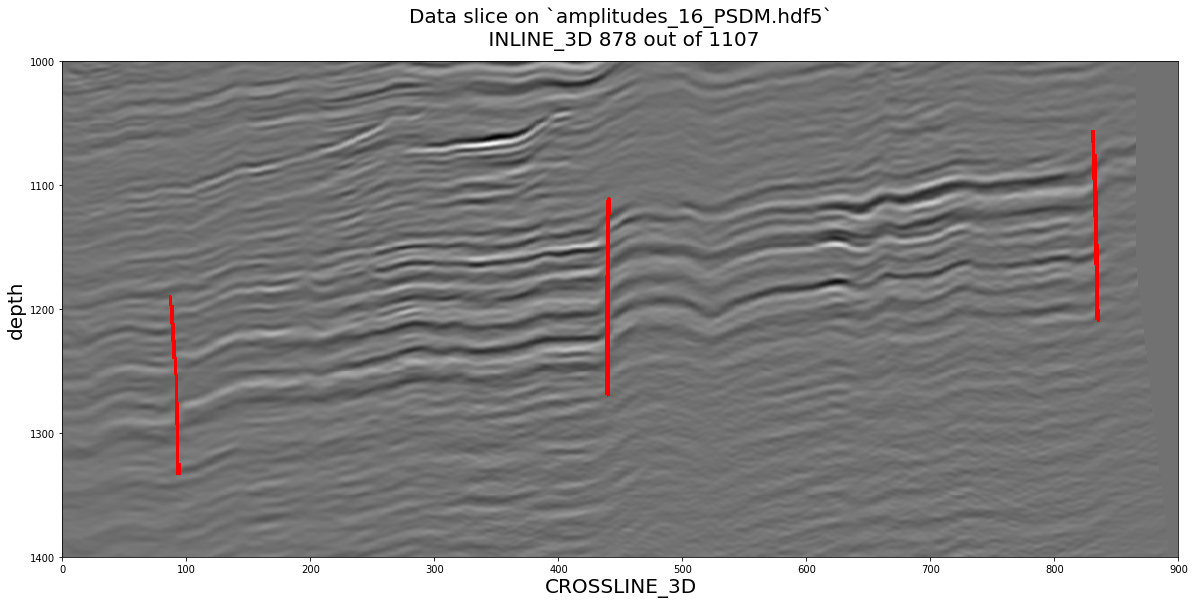

In [147]:
i = dataset.labels[0][0].points[0, 1]
zoom_slice = (slice(None), slice(1000, 1500))
dataset.show_slide(i, axis=0, zoom_slice=zoom_slice, figsize=(20, 10), mode='overlap')

In [150]:
geometry = dataset.geometries[0]
geometry.apply_conv()

AttributeError: 'SeismicGeometryHDF5' object has no attribute 'apply_conv'